# Breast cancer prediction

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


sns.set_style()

In [86]:
df = pd.read_csv("data.csv")
df.sample(n = 10,  random_state=42) 

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
204    87930         B        12.47         18.60           81.09      481.9   
70    859575         M        18.94         21.31          123.60     1130.0   
131     8670         M        15.46         19.48          101.70      748.9   
431   907915         B        12.40         17.68           81.47      467.8   
540   921385         B        11.54         14.44           74.65      402.9   
567   927241         M        20.60         29.33          140.10     1265.0   
369  9012000         M        22.01         21.90          147.20     1482.0   
29    853201         M        17.57         15.05          115.00      955.1   
81   8611161         B        13.34         15.86           86.49      520.0   
477   911673         B        13.90         16.62           88.97      599.4   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
204          0.09965           0.10580         0.08005              0.03821   
70           0.09009           0.10290         0.10800              0.07951   
131          0.10920           0.12230         0.14660              0.08087   
431          0.10540           0.13160         0.07741              0.02799   
540          0.09984           0.11200         0.06737              0.02594   
567          0.11780           0.27700         0.35140              0.15200   
369          0.10630           0.19540         0.24480              0.15010   
29           0.09847           0.11570         0.09875              0.07953   
81           0.10780           0.15350         0.11690              0.06987   
477          0.06828           0.05319         0.02224              0.01339   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
204  ...          24.64            96.05       677.9           0.14260   
70   ...          26.58           165.90      1866.0           0.11930   
131  ...          26.00           124.90      1156.0           0.15460   
431  ...          22.91            89.61       515.8           0.14500   
540  ...          19.68            78.78       457.8           0.13450   
567  ...          39.42           184.60      1821.0           0.16500   
369  ...          25.80           195.00      2227.0           0.12940   
29   ...          19.52           134.90      1227.0           0.12550   
81   ...          23.19            96.66       614.9           0.15360   
477  ...          21.80           101.20       718.9           0.09384   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
204             0.2378           0.2671               0.10150          0.3014   
70              0.2336           0.2687               0.17890          0.2551   
131             0.2394           0.3791               0.15140          0.2837   
431             0.2629           0.2403               0.07370          0.2556   
540             0.2118           0.1797               0.06918          0.2329   
567             0.8681           0.9387               0.26500          0.4087   
369             0.3885           0.4756               0.24320          0.2741   
29              0.2812           0.2489               0.14560          0.2756   
81              0.4791           0.4858               0.17080          0.3527   
477             0.2006           0.1384               0.06222          0.2679   

     fractal_dimension_worst  Unnamed: 32  
204                  0.08750          NaN  
70                   0.06589          NaN  
131                  0.08019          NaN  
431                  0.09359          NaN  
540                  0.08134          NaN  
567                  0.12400          NaN  
369                  0.08574          NaN  
29                   0.07919          NaN  
81                   0.10160          NaN  
477                  0.07698          NaN  

[10 rows x 33 columns]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [88]:
# Droping columns with no useful info
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)

In [89]:
# Encoding target labels
df["diagnosis"] = pd.get_dummies(df["diagnosis"],drop_first=True)
df.sample(n = 10,  random_state=42) 

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
204          0        12.47         18.60           81.09      481.9   
70           1        18.94         21.31          123.60     1130.0   
131          1        15.46         19.48          101.70      748.9   
431          0        12.40         17.68           81.47      467.8   
540          0        11.54         14.44           74.65      402.9   
567          1        20.60         29.33          140.10     1265.0   
369          1        22.01         21.90          147.20     1482.0   
29           1        17.57         15.05          115.00      955.1   
81           0        13.34         15.86           86.49      520.0   
477          0        13.90         16.62           88.97      599.4   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
204          0.09965           0.10580         0.08005              0.03821   
70           0.09009           0.10290         0.10800              0.07951   
131          0.10920           0.12230         0.14660              0.08087   
431          0.10540           0.13160         0.07741              0.02799   
540          0.09984           0.11200         0.06737              0.02594   
567          0.11780           0.27700         0.35140              0.15200   
369          0.10630           0.19540         0.24480              0.15010   
29           0.09847           0.11570         0.09875              0.07953   
81           0.10780           0.15350         0.11690              0.06987   
477          0.06828           0.05319         0.02224              0.01339   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
204         0.1925  ...         14.97          24.64            96.05   
70          0.1582  ...         24.86          26.58           165.90   
131         0.1931  ...         19.26          26.00           124.90   
431         0.1811  ...         12.88          22.91            89.61   
540         0.1818  ...         12.26          19.68            78.78   
567         0.2397  ...         25.74          39.42           184.60   
369         0.1824  ...         27.66          25.80           195.00   
29          0.1739  ...         20.01          19.52           134.90   
81          0.1942  ...         15.53          23.19            96.66   
477         0.1813  ...         15.14          21.80           101.20   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
204       677.9           0.14260             0.2378           0.2671   
70       1866.0           0.11930             0.2336           0.2687   
131      1156.0           0.15460             0.2394           0.3791   
431       515.8           0.14500             0.2629           0.2403   
540       457.8           0.13450             0.2118           0.1797   
567      1821.0           0.16500             0.8681           0.9387   
369      2227.0           0.12940             0.3885           0.4756   
29       1227.0           0.12550             0.2812           0.2489   
81        614.9           0.15360             0.4791           0.4858   
477       718.9           0.09384             0.2006           0.1384   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
204               0.10150          0.3014                  0.08750  
70                0.17890          0.2551                  0.06589  
131               0.15140          0.2837                  0.08019  
431               0.07370          0.2556                  0.09359  
540               0.06918          0.2329                  0.08134  
567               0.26500          0.4087                  0.12400  
369               0.24320          0.2741                  0.08574  
29                0.14560          0.2756                  0.07919  
81                0.17080          0.3527                  0.10160  
477               0.06222          0.2679   

[Text(0, 0, 'Benign'), Text(1, 0, 'Malignant')]

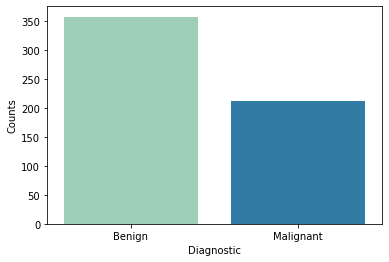

In [136]:
# Checking out the distribution of our target variable 'diagnosis'

sns.set_palette("YlGnBu")
ax = sns.countplot(x = df['diagnosis'], palette = "YlGnBu")
ax.set(xlabel="Diagnostic", ylabel = "Counts")
labels = ['Benign', 'Malignant']
ax.set_xticklabels(labels)

<AxesSubplot:>

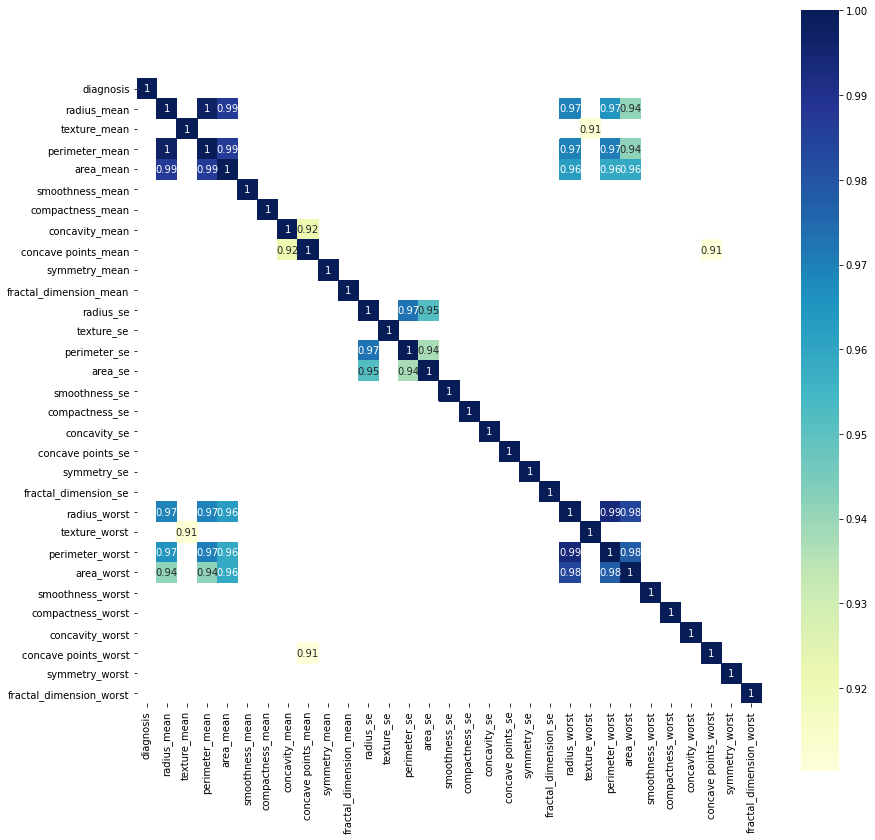

In [124]:
# Finding the most correlated variables
corr_total = df.corr()
corr = corr_total[corr_total>=0.9]
plt.figure(figsize = (14,14))
sns.heatmap(corr, cbar = True, square = True, annot =True, cmap="YlGnBu")

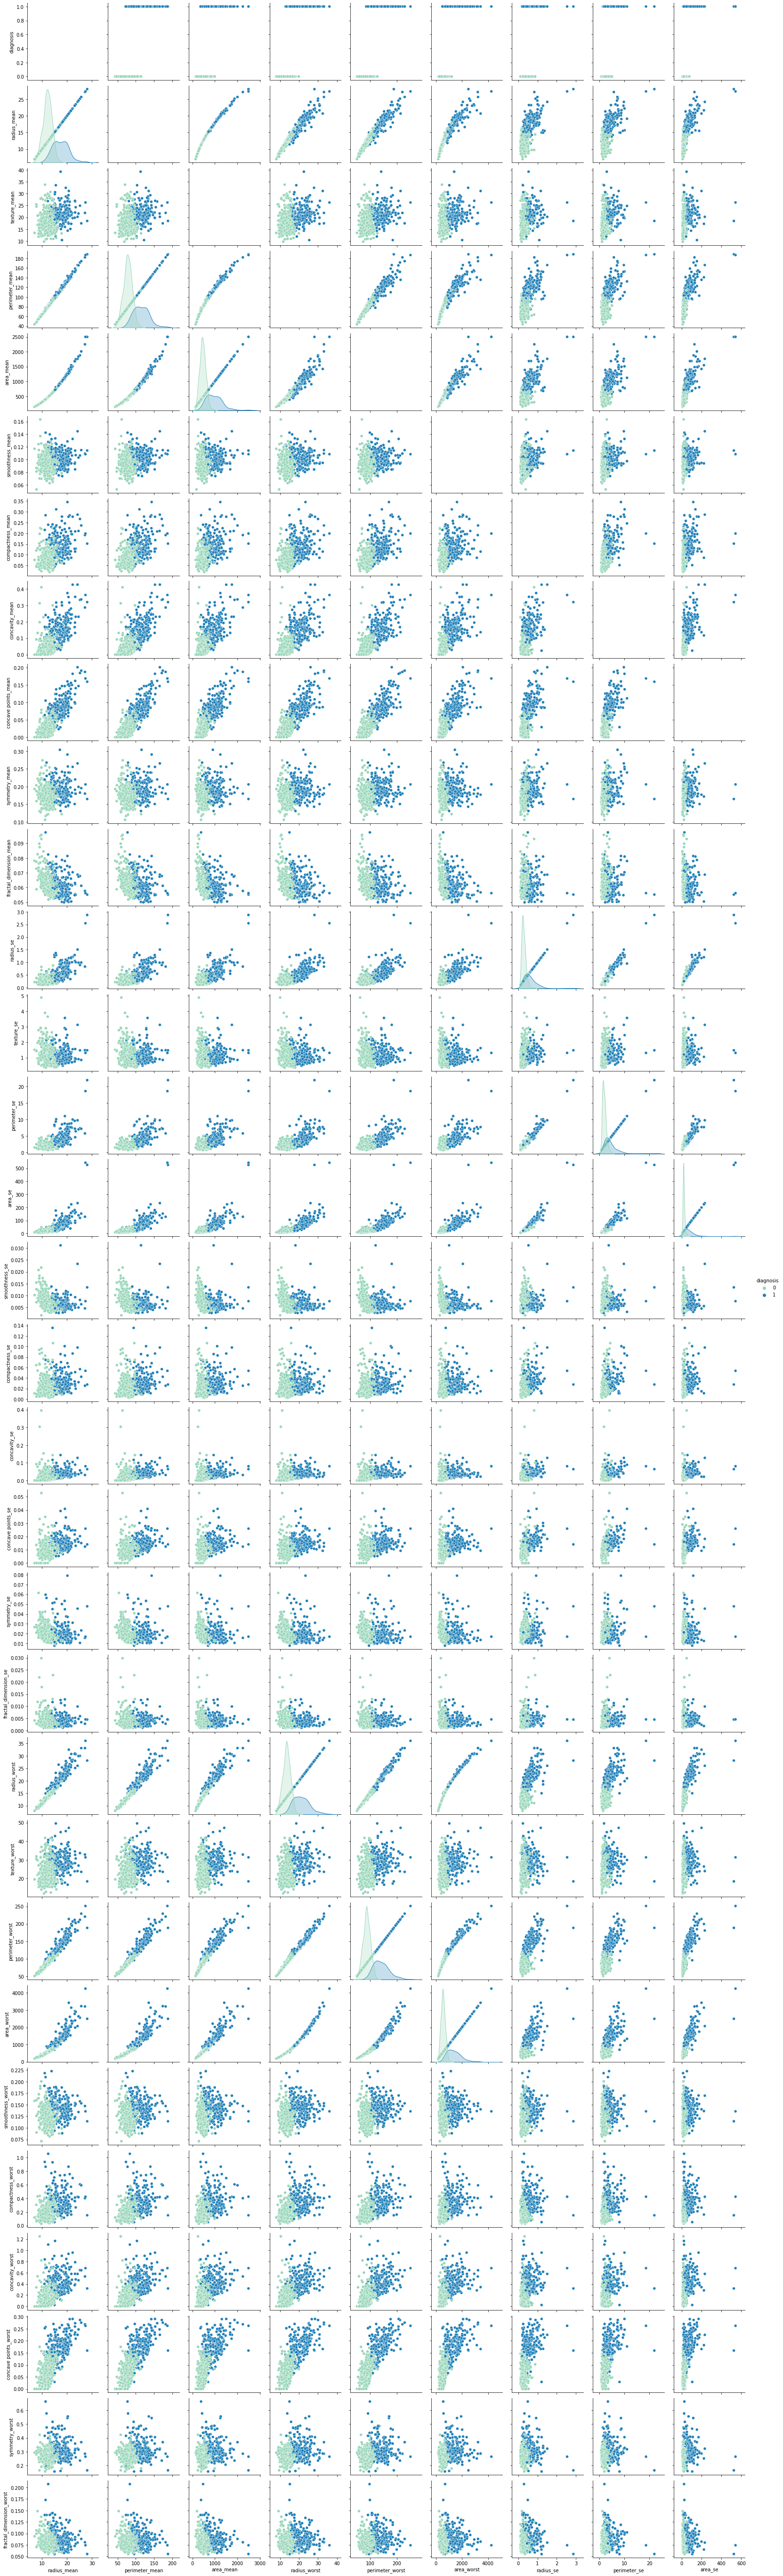

In [128]:
# Ploting pairwise relationships
sns.pairplot(x_vars = ['radius_mean','perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','radius_se','perimeter_se','area_se'],y_vars =df.columns, data = df, hue='diagnosis',  palette = "YlGnBu")

In [129]:
# Droping correlated variables
df.drop(['perimeter_mean','area_mean','perimeter_worst','area_worst','radius_worst','perimeter_se','area_se'], axis = 1, inplace=True)

In [131]:
# Standardize features and creating the training/test sets
X = df.iloc[:,1:]
y = df.iloc[:,0]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [144]:
# Evaluating a random forest classifier with cross validation
rfc = RandomForestClassifier(n_jobs = -1, random_state =42)
rfc_cv_score = cross_validate(rfc, X, y, cv = 10, scoring=["accuracy", "precision","recall","f1"])
print(f"Accuracy: \t {rfc_cv_score['test_accuracy'].mean():.4f}+/- {rfc_cv_score['test_accuracy'].std():.4f}")
print(f"Precision: \t {rfc_cv_score['test_precision'].mean():.4f}+/- {rfc_cv_score['test_precision'].std():.4f}")
print(f"Recall: \t {rfc_cv_score['test_recall'].mean():.4f}+/- {rfc_cv_score['test_recall'].std():.4f}")
print(f"F1: \t\t {rfc_cv_score['test_f1'].mean():.4f} +/- {rfc_cv_score['test_f1'].std():.4f}")

Accuracy: 	 0.9526+/- 0.0248
Precision: 	 0.9671+/- 0.0401
Recall: 	 0.9054+/- 0.0524
F1: 		 0.9341 +/- 0.0344


In [145]:
# Training and testing our random forest classifier
rfc.fit(X_train, y_train)
accu = accuracy_score(y_test, rfc.predict(X_test))
pres = precision_score(y_test, rfc.predict(X_test))
f1sco = f1_score(y_test, rfc.predict(X_test))
reca = recall_score(y_test, rfc.predict(X_test))
print(f"Accuracy: {accu:.4f}, Precision: {pres:.4f}, Recall: {reca:.4f} y F1:{f1sco:.4} ")

Accuracy: 0.9474, Precision: 0.9500, Recall: 0.9048 y F1:0.9268 


[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Benign')]

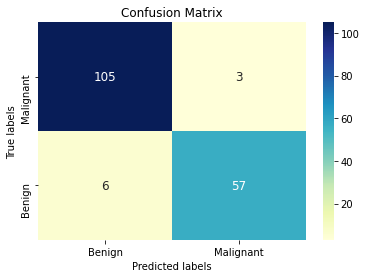

In [143]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax = ax,annot_kws={'size':12},  cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Malignant', 'Benign'])

In [147]:
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
lrc = LogisticRegression()
lrc_cv_score = cross_validate(lrc, X, y, cv = 10, scoring=["accuracy", "precision","recall","f1"])
print(f"Accuracy: \t {lrc_cv_score['test_accuracy'].mean():.4f}+/- {lrc_cv_score['test_accuracy'].std():.4f}")
print(f"Precision: \t {lrc_cv_score['test_precision'].mean():.4f}+/- {lrc_cv_score['test_precision'].std():.4f}")
print(f"Recall: \t {lrc_cv_score['test_recall'].mean():.4f}+/- {lrc_cv_score['test_recall'].std():.4f}")
print(f"F1: \t\t {lrc_cv_score['test_f1'].mean():.4f} +/- {lrc_cv_score['test_f1'].std():.4f}")

Accuracy: 	 0.9754+/- 0.0161
Precision: 	 0.9724+/- 0.0294
Recall: 	 0.9621+/- 0.0285
F1: 		 0.9668 +/- 0.0219


Accuracy: 0.9766, Precision: 0.9538, Recall: 0.9841 y F1:0.9688 


[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Benign')]

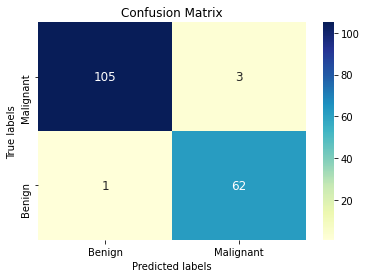

In [153]:
lrc.fit(X_train, y_train)
accu = accuracy_score(y_test, lrc.predict(X_test))
pres = precision_score(y_test, lrc.predict(X_test))
f1sco = f1_score(y_test, lrc.predict(X_test))
reca = recall_score(y_test, lrc.predict(X_test))
print(f"Accuracy: {accu:.4f}, Precision: {pres:.4f}, Recall: {reca:.4f} y F1:{f1sco:.4} ")
cm = confusion_matrix(y_test, lrc.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax = ax,annot_kws={'size':12},  cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Malignant', 'Benign'])

In [155]:
from sklearn.svm import SVC

Accuracy: 	 0.9719+/- 0.0262
Precision: 	 0.9766+/- 0.0302
Recall: 	 0.9478+/- 0.0581
F1: 		 0.9611 +/- 0.0378
Accuracy: 0.9591, Precision: 0.9516, Recall: 0.9365 y F1:0.944 


[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Benign')]

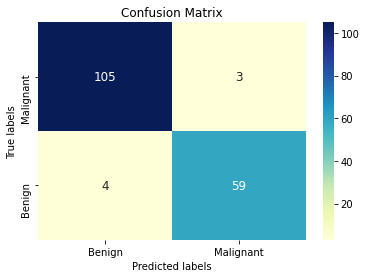

In [158]:
svc = SVC()
svc_cv_score = cross_validate(svc, X, y, cv = 10, scoring=["accuracy", "precision","recall","f1"])
print(f"Accuracy: \t {svc_cv_score['test_accuracy'].mean():.4f}+/- {svc_cv_score['test_accuracy'].std():.4f}")
print(f"Precision: \t {svc_cv_score['test_precision'].mean():.4f}+/- {svc_cv_score['test_precision'].std():.4f}")
print(f"Recall: \t {svc_cv_score['test_recall'].mean():.4f}+/- {svc_cv_score['test_recall'].std():.4f}")
print(f"F1: \t\t {svc_cv_score['test_f1'].mean():.4f} +/- {svc_cv_score['test_f1'].std():.4f}")
svc.fit(X_train, y_train)
accu = accuracy_score(y_test, svc.predict(X_test))
pres = precision_score(y_test, svc.predict(X_test))
f1sco = f1_score(y_test, svc.predict(X_test))
reca = recall_score(y_test, svc.predict(X_test))
print(f"Accuracy: {accu:.4f}, Precision: {pres:.4f}, Recall: {reca:.4f} y F1:{f1sco:.4} ")
cm = confusion_matrix(y_test, svc.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax = ax,annot_kws={'size':12},  cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Malignant', 'Benign'])

Accuracy: 	 0.9736+/- 0.0196
Precision: 	 0.9769+/- 0.0298
Recall: 	 0.9526+/- 0.0426
F1: 		 0.9639 +/- 0.0276
Accuracy: 0.9708, Precision: 0.9531, Recall: 0.9683 y F1:0.9606 


[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Benign')]

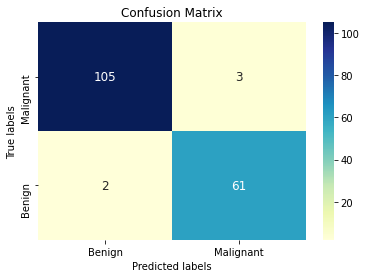

In [165]:
svc = SVC(kernel = 'linear')
svc_cv_score = cross_validate(svc, X, y, cv = 10, scoring=["accuracy", "precision","recall","f1"])
print(f"Accuracy: \t {svc_cv_score['test_accuracy'].mean():.4f}+/- {svc_cv_score['test_accuracy'].std():.4f}")
print(f"Precision: \t {svc_cv_score['test_precision'].mean():.4f}+/- {svc_cv_score['test_precision'].std():.4f}")
print(f"Recall: \t {svc_cv_score['test_recall'].mean():.4f}+/- {svc_cv_score['test_recall'].std():.4f}")
print(f"F1: \t\t {svc_cv_score['test_f1'].mean():.4f} +/- {svc_cv_score['test_f1'].std():.4f}")
svc.fit(X_train, y_train)
accu = accuracy_score(y_test, svc.predict(X_test))
pres = precision_score(y_test, svc.predict(X_test))
f1sco = f1_score(y_test, svc.predict(X_test))
reca = recall_score(y_test, svc.predict(X_test))
print(f"Accuracy: {accu:.4f}, Precision: {pres:.4f}, Recall: {reca:.4f} y F1:{f1sco:.4} ")
cm = confusion_matrix(y_test, svc.predict(X_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax = ax,annot_kws={'size':12},  cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Malignant', 'Benign'])